In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [3]:
data.shape

(6700, 16)

In [106]:
food_beverage = data[data['class']=='fynota']
food_beverage = food_beverage[food_beverage['price']<9000]
food_beverage['profit_parameter']= food_beverage['profit']/(food_beverage['price']*(1-food_beverage['discount']))
food_beverage['cost_price']=food_beverage['price']*(1-food_beverage['discount'])-food_beverage['profit']
food_beverage['date_dt']=pd.to_datetime(food_beverage['placement date'])
food_beverage['year'],food_beverage['month']=(food_beverage['date_dt'].dt.year,
                                              food_beverage['date_dt'].dt.month)

In [88]:
#Splitting 3 categories of data for better model fitting and analysis
food_beverage = data[data['class']=='fynota']
clothing = data[data['class']=='qexty']
electronics=data[data['class']=='kariox']
#Eliminate food_beverage outliers
food_beverage = food_beverage[food_beverage['price']<9000]
clothing= clothing[clothing['price']< 3500]
electronics = electronics[electronics['price']<3500]
print(food_beverage.shape)
print(clothing.shape)
print(electronics.shape)

(1226, 16)
(1430, 16)
(4024, 16)


In [89]:
#Calculating mean profit and cost price for additional variation studies

clothing['profit_parameter']= clothing['profit']/(clothing['price']*(1-clothing['discount']))
clothing['cost_price']=clothing['price']*(1-clothing['discount'])-clothing['profit']
electronics['profit_parameter']=electronics['profit']/(electronics['price']*(1-electronics['discount']))
electronics['cost_price']=electronics['price']*(1-electronics['discount'])-electronics['profit']

In [90]:
#Extract year and month from the data to see how profit is correleated with time
from datetime import datetime

clothing['date_dt']=pd.to_datetime(clothing['placement date'])
electronics['date_dt']=pd.to_datetime(electronics['placement date'])
food_beverage['year'],food_beverage['month']=(food_beverage['date_dt'].dt.year,food_beverage['date_dt'].dt.month)
clothing['year'],clothing['month']=(clothing['date_dt'].dt.year,clothing['date_dt'].dt.month)
electronics['year'],electronics['month']=(electronics['date_dt'].dt.year,electronics['date_dt'].dt.month)

In [7]:
#We change the categorical variables to integers for easy formatting
 #define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
def getObjectFeature(df, col, datalength=6700):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        return df1 # make the new (integer) column from the conversion

In [10]:
#Test the function if it converts successfully
fcntest = getObjectFeature(electronics,'departure city')
fcntest.head(10)

feature departure city is missing data.


,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,profit,delivery date,address code,departure state,placement date,profit_parameter,cost_price,date_dt,year,month
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,...,5.5512,2018-01-01,77095,Texas,2018-01-01,0.421875,7.6072,2018-01-01,2018,1
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,...,13.3650,2018-01-01,48185,Michigan,2018-01-01,0.450000,16.3350,2018-01-01,2018,1
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,...,12.7368,2018-01-01,48185,Michigan,2018-01-01,0.290000,31.1832,2018-01-01,2018,1
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,...,15.9792,2018-01-01,48185,Michigan,2018-01-01,0.240000,50.6008,2018-01-01,2018,1
5,6,Westland,0.1,247.716,4,Central,kariox,Consumer,battery,Standard Class,...,93.5816,2018-01-01,48185,Michigan,2018-01-01,0.419753,129.3628,2018-01-01,2018,1
6,7,Westland,0.0,19.050,5,Central,kariox,Consumer,headset,Standard Class,...,8.9535,2018-01-01,48185,Michigan,2018-01-01,0.470000,10.0965,2018-01-01,2018,1
8,9,Smyrna,0.7,67.194,1,South,kariox,Corporate,headset,Standard Class,...,-51.5154,2018-01-01,37167,Tennessee,2018-01-01,-2.555556,71.6736,2018-01-01,2018,1
9,10,Westland,0.0,13.980,1,Central,kariox,Consumer,laptop,Standard Class,...,4.0542,2018-01-01,48185,Michigan,2018-01-01,0.290000,9.9258,2018-01-01,2018,1
11,12,Jonesboro,0.0,23.340,3,South,kariox,Consumer,watch,Standard Class,...,10.9698,2018-01-01,72401,Arkansas,2018-01-01,0.470000,12.3702,2018-01-01,2018,1
12,13,Jonesboro,0.0,6.630,3,South,kariox,Consumer,television,Standard Class,...,1.7901,2018-01-01,72401,Arkansas,2018-01-01,0.270000,4.8399,2018-01-01,2018,1


<AxesSubplot:>

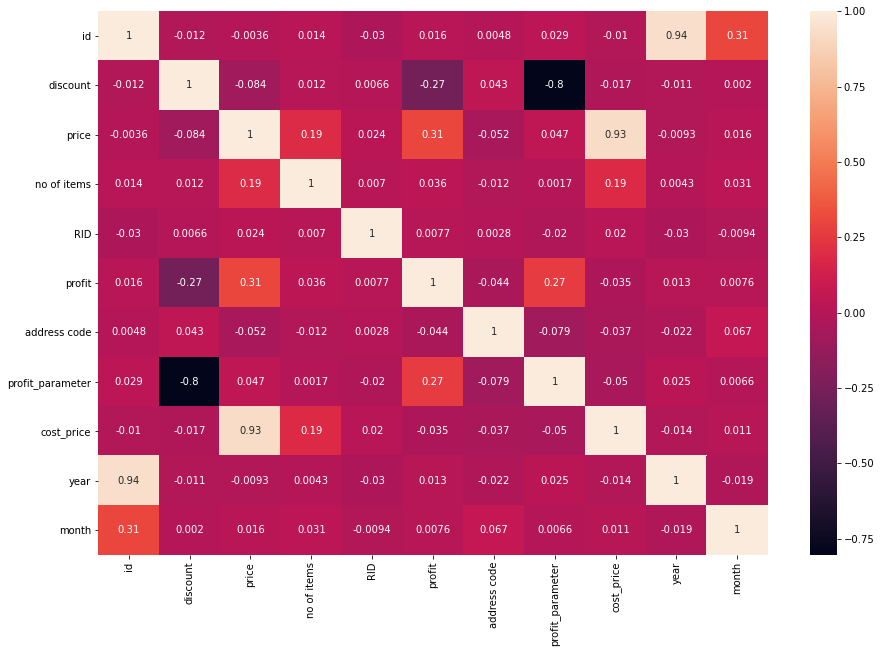

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(electronics.corr(), annot=True)

<AxesSubplot:>

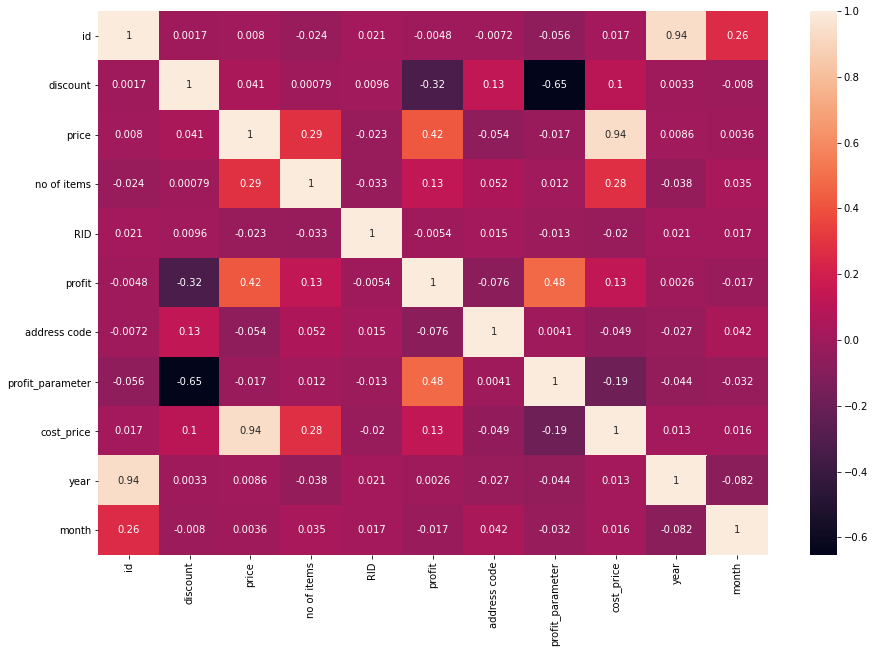

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(food_beverage.corr(), annot=True)

<AxesSubplot:>

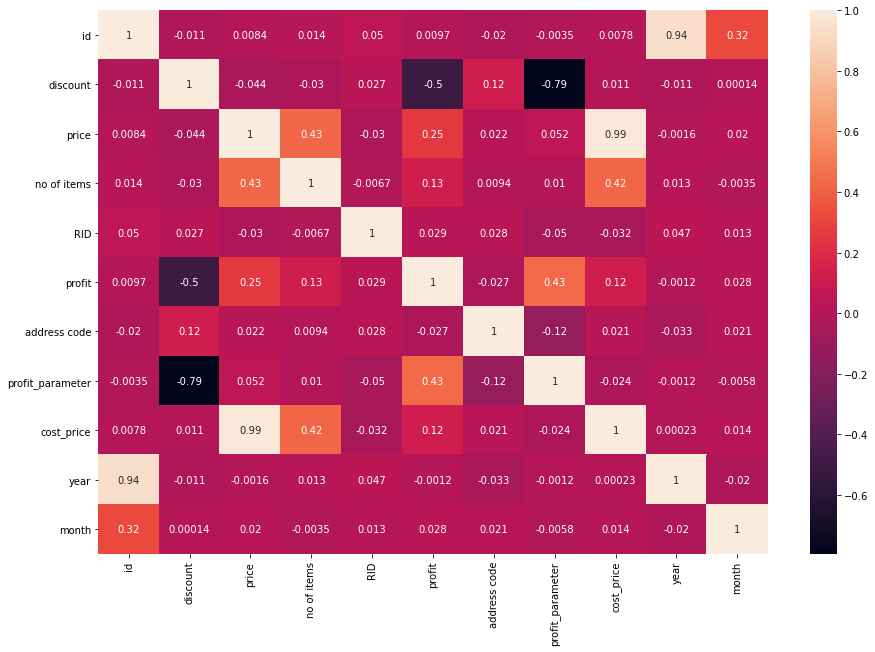

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(clothing.corr(), annot=True)

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [25]:
electronics.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,profit,delivery date,address code,departure state,placement date,profit_parameter,cost_price,date_dt,year,month
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,...,5.5512,2018-01-01,77095,Texas,2018-01-01,0.421875,7.6072,2018-01-01,2018,1
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,...,13.3650,2018-01-01,48185,Michigan,2018-01-01,0.450000,16.3350,2018-01-01,2018,1
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,...,12.7368,2018-01-01,48185,Michigan,2018-01-01,0.290000,31.1832,2018-01-01,2018,1
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,...,15.9792,2018-01-01,48185,Michigan,2018-01-01,0.240000,50.6008,2018-01-01,2018,1
5,6,Westland,0.1,247.716,4,Central,kariox,Consumer,battery,Standard Class,...,93.5816,2018-01-01,48185,Michigan,2018-01-01,0.419753,129.3628,2018-01-01,2018,1


In [27]:
#Getting dummies for training on random forests
electronics_dummy= pd.get_dummies(electronics[['class','delivery type','segment',
    'location','RID','profit_parameter','cost_price','year','price','no of items','discount']])
electronics_dummy.head()

,RID,profit_parameter,cost_price,year,price,no of items,discount,class_kariox,delivery type_First Class,delivery type_Same Day,delivery type_Second Class,delivery type_Standard Class,segment_Consumer,segment_Corporate,segment_Home Office,location_Central,location_East,location_South,location_West
0,7981,0.421875,7.6072,2018,16.448,2,0.2,1,0,0,0,1,1,0,0,1,0,0,0
1,6334,0.450000,16.3350,2018,29.700,5,0.0,1,0,0,0,1,1,0,0,1,0,0,0
3,6332,0.290000,31.1832,2018,43.920,3,0.0,1,0,0,0,1,1,0,0,1,0,0,0
4,6331,0.240000,50.6008,2018,66.580,2,0.0,1,0,0,0,1,1,0,0,1,0,0,0
5,6330,0.419753,129.3628,2018,247.716,4,0.1,1,0,0,0,1,1,0,0,1,0,0,0


In [28]:
electronics.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,profit,delivery date,address code,departure state,placement date,profit_parameter,cost_price,date_dt,year,month
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,...,5.5512,2018-01-01,77095,Texas,2018-01-01,0.421875,7.6072,2018-01-01,2018,1
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,...,13.3650,2018-01-01,48185,Michigan,2018-01-01,0.450000,16.3350,2018-01-01,2018,1
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,...,12.7368,2018-01-01,48185,Michigan,2018-01-01,0.290000,31.1832,2018-01-01,2018,1
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,...,15.9792,2018-01-01,48185,Michigan,2018-01-01,0.240000,50.6008,2018-01-01,2018,1
5,6,Westland,0.1,247.716,4,Central,kariox,Consumer,battery,Standard Class,...,93.5816,2018-01-01,48185,Michigan,2018-01-01,0.419753,129.3628,2018-01-01,2018,1


In [15]:
#Setting up my data for training on electronics data
y1= electronics['profit']
electronics.drop(['profit','departure state','departure city',
                  'date_dt','class','delivery date','month','segment','address code','no of items','year','RID','id','placement date'],axis=1,inplace=True)
electronics_dummy= pd.get_dummies(electronics[['delivery type',
    'location','sub-class','profit_parameter','cost_price','price','discount']])
X1=electronics_dummy
print(X1.shape)
print(y1.shape)

(4024, 21)
(4024,)


In [107]:
#Setting up my data for training on food_beverage data
y2= food_beverage['profit']
food_beverage.drop(['profit','departure city','departure state',
 'date_dt','segment','delivery date','class','placement date','RID','id','month','year'],axis=1,inplace=True)
food_beverage_dummy= pd.get_dummies(food_beverage[['location','sub-class','delivery type','address code',
    'profit_parameter','cost_price','price','no of items','discount']])
X2=food_beverage_dummy
print(X2.shape)
print(y2.shape)

(1226, 18)
(1226,)


In [19]:
#Setting up my data for training on clothing data
y3= clothing['profit']
clothing.drop(['profit','departure city','departure state',
                    'date_dt','delivery date','placement date','id','year'],axis=1,inplace=True)
clothing_dummy= pd.get_dummies(clothing[['class','delivery type','segment',
    'location','sub-class','delivery type','address code','RID','profit_parameter','cost_price','month','price','no of items','discount']])
X3=clothing_dummy
print(X3.shape)
print(y3.shape)

(1430, 28)
(1430,)


In [103]:
#I will be using sklearn lasso or ridge regression to predict for electronics and food_beverage because 
#Random forest is not working that good


In [16]:
#Test train split for electronics

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.33, random_state=3)
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((2696, 21), (2696,), (1328, 21), (1328,))

In [108]:
#Test train split for food beverage
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.33, random_state=3)
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((821, 18), (821,), (405, 18), (405,))

In [20]:
#Test train split for clothing
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.33, random_state=3)
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((958, 28), (958,), (472, 28), (472,))

In [138]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from patsy import dmatrices
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split

In [139]:
en_cv=ElasticNetCV(cv=5,random_state=42).fit(X2_train,y2_train)
food_preds_encv= en_cv.predict(X2_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test,food_preds_encv))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test,food_preds_encv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test,food_preds_encv)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y2_test,food_preds_encv)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 95.19151794162795
Mean Squared Error: 160887.2345618764
Root Mean Squared Error: 401.1075099794024
R2 score is 0.15255955514523023


In [17]:
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [61]:
#Applying SVM for predictions
from sklearn.svm import SVR
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [112]:
SVMregressor = SVR(kernel='rbf',C=1e3, gamma=0.9)
SVMregressor.fit(X2_train,y2_train)
#5 Predicting a new result
SVM_food_preds = SVMregressor.predict(X2_test)

In [129]:
data_dmatrix = xgb.DMatrix(data=X2,label=y2)

In [151]:
import xgboost as xgb
#X, y = data.iloc[:,:-1],data.iloc[:,-1]
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate =0.75,
                max_depth = 50, alpha = 20, n_estimators = 10)
xg_reg.fit(X2_train,y2_train)

preds = xg_reg.predict(X2_test)
rmse = np.sqrt(mean_squared_error(y2_test, preds))
print("RMSE: %f" % (rmse))
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=60,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
#cv_preds=cv_results.fit(X2_test)
#cv_results

[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 299.102175
[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/reg

In [135]:
print((cv_results["test-rmse-mean"]).tail(1))

59    190.921412
Name: test-rmse-mean, dtype: float64


In [130]:
#xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
food_predicted_y = xg_reg.predict(X2_test)
print(metrics.r2_score(y2_test,food_predicted_y))
#print(metrics.mean_squared_log_error(y2_test,food_predicted_y))
    
plt.figure(figsize=(10,10))
sns.regplot(y2_test,food_predicted_y, fit_reg=True, scatter_kws={"s": 100})

[01:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)

In [110]:
#Using Adaboost regressor for fitting in food data
model_ABC = AdaBoostRegressor()
model_ABC.fit(X2_train, y2_train)
print(model_ABC)
food_predicted_y = model_ABC.predict(X2_test)
#print(metrics.classification_report(food_predicted_y,y2_test))
#print(metrics.confusion_matrix(food_predicted_y,y2_test))

AdaBoostRegressor()


0.40868506827365003


C:\Users\Arkoprova Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit'>

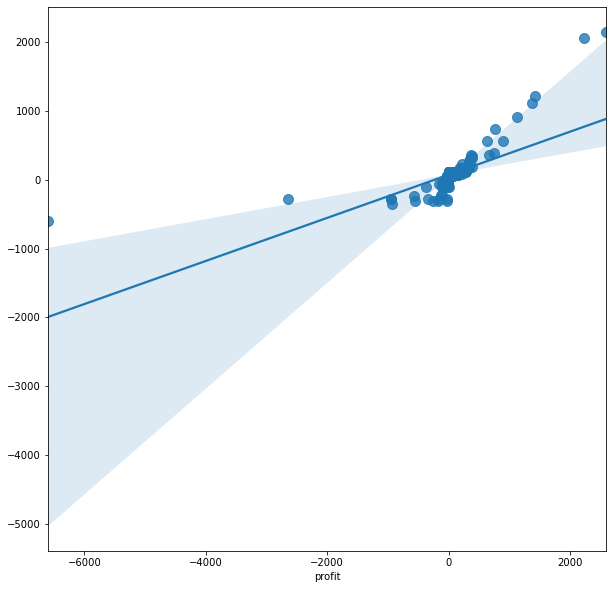

In [111]:
print(metrics.r2_score(y2_test,food_predicted_y))
#print(metrics.mean_squared_log_error(y2_test,food_predicted_y))
    
plt.figure(figsize=(10,10))
sns.regplot(y2_test,food_predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [70]:
#Applying Ridge regression
ridge=Ridge(normalize=True,random_state=0).fit(X1_train,y1_train)
ridge.coef_[0]

6.499518764219888

In [113]:

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=20,random_state=42)
rf.fit(X1_train, y1_train)
rf_electronics_pred=rf.predict(X1_test)

In [42]:
#Using decision tree
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=0, max_depth = 11)
dtr_model.fit(X1_train, y1_train)
electronics_preds = dtr_model.predict(X1_test)
print(mean_absolute_error(y1_test, electronics_preds), dtr_model.get_depth())

8.557812851259754 11


In [97]:
#Decision tree for food
dtr_model = DecisionTreeRegressor(random_state=0, max_depth = 13)
dtr_model.fit(X2_train, y2_train)
food_preds = dtr_model.predict(X2_test)
print(mean_absolute_error(y2_test, food_preds), dtr_model.get_depth())

48.197241298431756 13


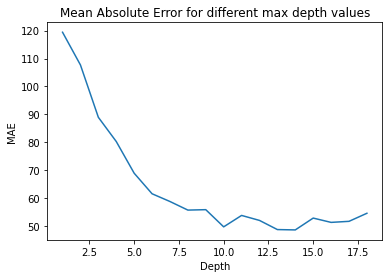

In [157]:
#Finding out error vs depth
maeList = []
depthList = []

for depths in range(1, 19):
    dtr_model = DecisionTreeRegressor(random_state=0, max_depth=depths)
    dtr_model.fit(X2_train, y2_train)
    preds = dtr_model.predict(X2_test)
    this_mae = mean_absolute_error(y2_test, preds)
    maeList.append(this_mae)
    depthList.append(depths)

plot.figure()
plot.plot(depthList, maeList)
plot.title("Mean Absolute Error for different max depth values")
plot.xlabel("Depth")
plot.ylabel("MAE")
plot.show()

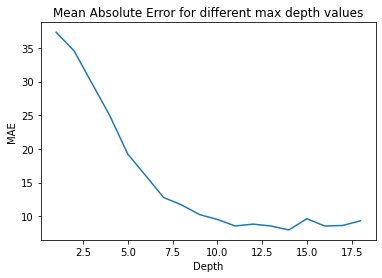

In [59]:
import matplotlib.pyplot as plot

maeList = []
depthList = []

for depths in range(1, 19):
    dtr_model = DecisionTreeRegressor(random_state=0, max_depth=depths)
    dtr_model.fit(X1_train, y1_train)
    preds = dtr_model.predict(X1_test)
    this_mae = mean_absolute_error(y1_test, preds)
    maeList.append(this_mae)
    depthList.append(depths)

plot.figure()
plot.plot(depthList, maeList)
plot.title("Mean Absolute Error for different max depth values")
plot.xlabel("Depth")
plot.ylabel("MAE")
plot.show()

In [114]:
rf_food = RandomForestRegressor(n_estimators=550, max_depth=15,random_state=42)
rf_food.fit(X2_train, y2_train)
rf_food_pred=rf_food.predict(X2_test)

In [58]:
#Tuning has been perfect for this random forest
rf_clothing = RandomForestRegressor(n_estimators=900, max_depth=9,random_state=43)
rf_clothing.fit(X3_train, y3_train)
rf_clothing_pred=rf_clothing.predict(X3_test)

In [60]:
y3_test  #Predictions are pretty good sob ,ile jacche

324      12.9900
5623     16.6140
5815      0.0000
2810     36.2250
4691     -1.6752
          ...   
3003    422.5100
66       28.5984
5274    -81.9400
4059     32.6332
537     -84.2928
Name: profit, Length: 472, dtype: float64

In [61]:
df=pd.DataFrame({'Actual_Clothing_Profit':y3_test, 'Predicted_CLothing_Profit':rf_clothing_pred})
df

,Actual_Clothing_Profit,Predicted_CLothing_Profit
324,12.9900,13.188974
5623,16.6140,14.536011
5815,0.0000,-0.157228
2810,36.2250,41.180313
4691,-1.6752,-2.409553
...,...,...
3003,422.5100,355.173986
66,28.5984,34.807521
5274,-81.9400,-69.883985
4059,32.6332,31.779191


In [25]:
import numpy as np
from sklearn import metrics

In [62]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, rf_clothing_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, rf_clothing_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, rf_clothing_pred)))

Mean Absolute Error: 9.929282159553766
Mean Squared Error: 622.8424835342438
Root Mean Squared Error: 24.95681236725243


In [63]:
#Evaluating using R^2 score
r2 = metrics.r2_score(y3_test,rf_clothing_pred)
print('R2 score is {}'.format(r2))

R2 score is 0.9609935054699242


In [115]:
#Testing for electronics our goodness of fit
df1=pd.DataFrame({'Actual_Electronics_Profit':y1_test, 'Predicted_Electronics_Profit':rf_electronics_pred})
df1
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test,rf_electronics_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,rf_electronics_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test,rf_electronics_pred)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y1_test,rf_electronics_pred)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 8.453159000436132
Mean Squared Error: 16414.11890142931
Root Mean Squared Error: 128.1175979381026
R2 score is 0.29699481134961103


In [61]:
#Testing for electronics our goodness of fit
df1=pd.DataFrame({'Actual_Electronics_Profit':y1_test, 'Predicted_Electronics_Profit':electronics_preds})
df1
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, electronics_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, electronics_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, electronics_preds)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y1_test, electronics_preds)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 8.557812851259754
Mean Squared Error: 14252.825059038058
Root Mean Squared Error: 119.38519614691789
R2 score is 0.38956150923473964


In [116]:
#Testing for electronics our goodness of fit
df1=pd.DataFrame({'Actual_Food_beverage_Profit':y2_test, 'Predicted_Food_Profit':rf_food_pred})
df1
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, rf_food_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, rf_food_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, rf_food_pred)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y2_test, rf_food_pred)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 38.474423385467446
Mean Squared Error: 116161.48117819468
Root Mean Squared Error: 340.82470740572006
R2 score is 0.3881432697087053


In [117]:
#Testing for electronics our goodness of fit
df1=pd.DataFrame({'Actual_Food_beverage_Profit':y2_test, 'Predicted_Food_Profit':food_preds})
df1
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test,food_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test,food_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test,food_preds)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y2_test,food_preds)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 48.197241298431756
Mean Squared Error: 126521.45642052537
Root Mean Squared Error: 355.6985471161295
R2 score is 0.3335742291508691


In [118]:

#Testing for electronics our goodness of fit
df1=pd.DataFrame({'Actual_Food_beverage_Profit':y2_test, 'Predicted_Food_Profit':SVM_food_preds})
df1
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test,SVM_food_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test,SVM_food_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test,SVM_food_preds)))
#Evaluating using R^2 score
r2 = metrics.r2_score(y2_test,SVM_food_preds)
print('R2 score is {}'.format(r2))

Mean Absolute Error: 133.46786098324733
Mean Squared Error: 190891.272309686
Root Mean Squared Error: 436.91105766469906
R2 score is -0.005480547698753613
